In [1]:
# data
import pandas as pd
import numpy as np


# visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from wordcloud import WordCloud
import missingno as msno

import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/MyDrive/Project Credit Risk/Data/credit_risk_dataset.csv")

In [4]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


# Feature Descriptions

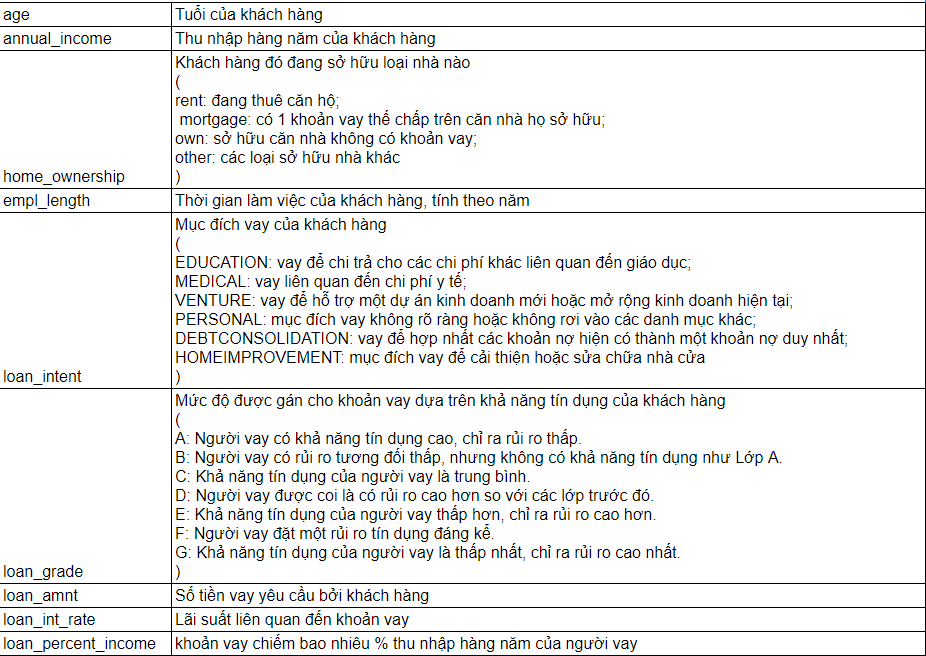

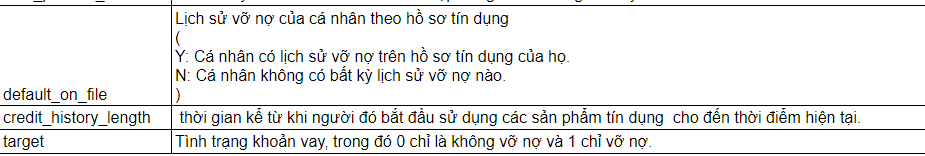

In [5]:
df = df.rename(columns={
    'person_age': 'age',
    'person_income': 'annual_income',
    'person_home_ownership': 'home_ownership',
    'person_emp_length': 'empl_length',
    'loan_status': 'target',
    'cb_person_default_on_file': 'default_on_file',
    'cb_person_cred_hist_length': 'credit_history_length'
})

In [6]:
df.head()

,age,annual_income,home_ownership,empl_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,target,loan_percent_income,default_on_file,credit_history_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    32581 non-null  int64  
 1   annual_income          32581 non-null  int64  
 2   home_ownership         32581 non-null  object 
 3   empl_length            31686 non-null  float64
 4   loan_intent            32581 non-null  object 
 5   loan_grade             32581 non-null  object 
 6   loan_amnt              32581 non-null  int64  
 7   loan_int_rate          29465 non-null  float64
 8   target                 32581 non-null  int64  
 9   loan_percent_income    32581 non-null  float64
 10  default_on_file        32581 non-null  object 
 11  credit_history_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


# EDA


<Axes: >

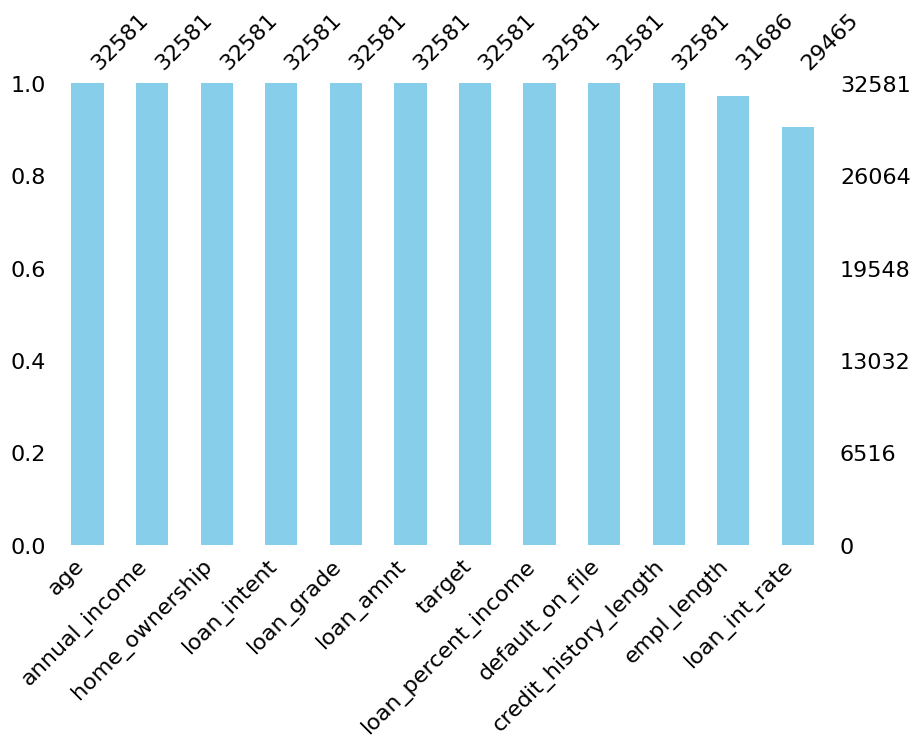

In [8]:
sorted_columns = df.isnull().sum().sort_values().index
msno.bar(df[sorted_columns], color='skyblue', figsize=(10, 6))


In [8]:
def plot_categorical_feature_distribution(df, column_name):
    if column_name in df.columns:
        # Calculate the ratio of the values in the categorical feature
        value_counts = df[column_name].value_counts(normalize=True)

        # Plot pie chart for the categorical feature ratios
        plt.figure(figsize=(8, 8))
        plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%')
        plt.title(f'Distribution of {column_name} Values')
        plt.show()
    else:
        print(f"The column '{column_name}' does not exist in the DataFrame.")

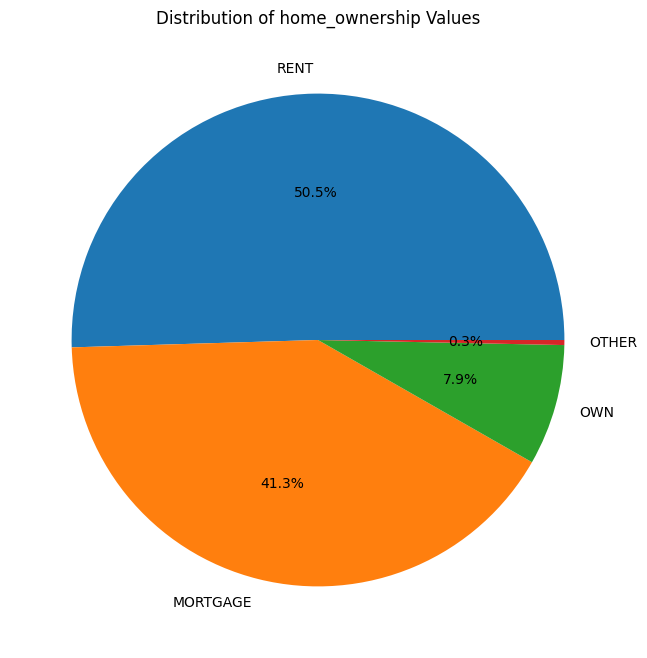

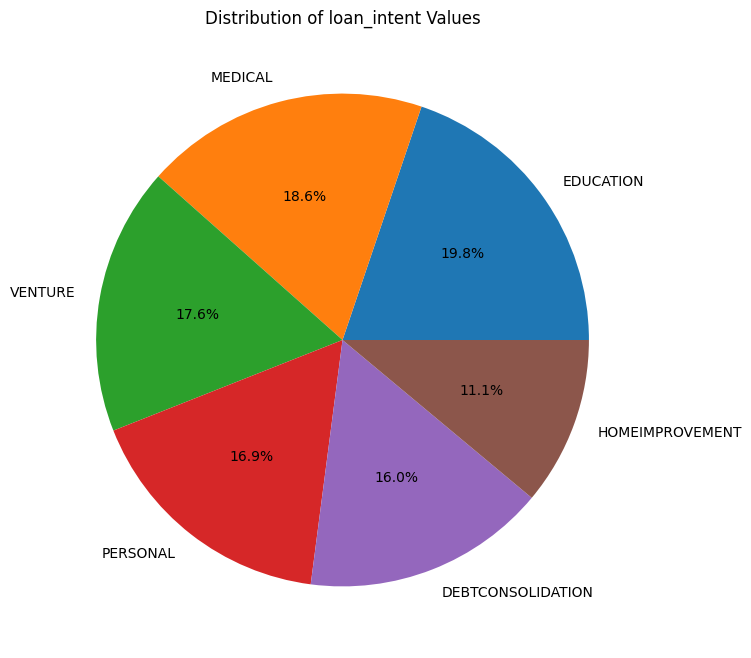

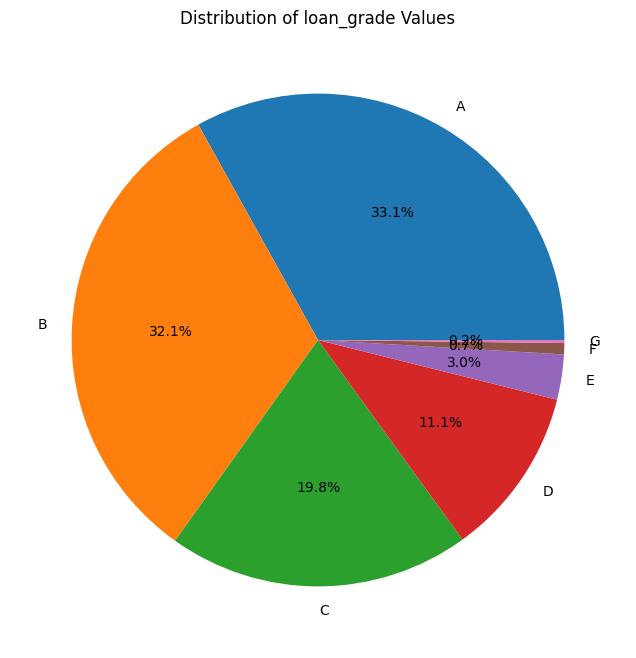

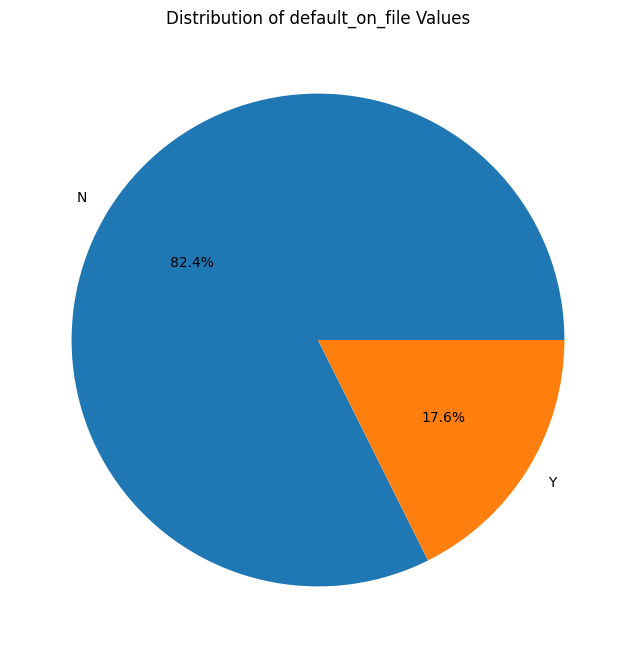

In [9]:
cat_cols = df.select_dtypes("object").columns
for cat in cat_cols:
  plot_categorical_feature_distribution(df, cat)

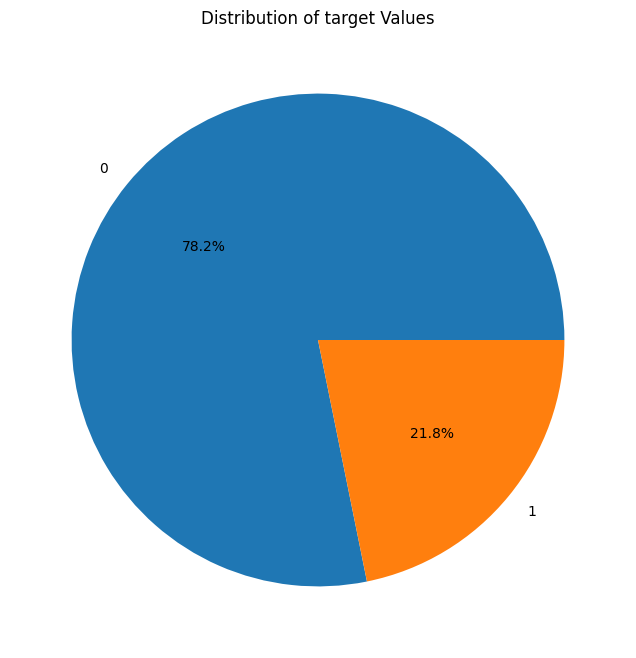

In [11]:
plot_categorical_feature_distribution(df, 'target')

In [9]:
def plot_data_distribution(df, column_name):
    if df[column_name].dtype == 'object' or pd.api.types.is_categorical_dtype(df[column_name]):
        # It's categorical, use countplot
        plt.figure(figsize=(10, 6))
        ax = sns.countplot(data=df, x=column_name, order=df[column_name].value_counts().index)
        plt.title(f'Distribution of {column_name}')
        plt.xlabel(column_name)
        plt.ylabel('Count')
        plt.xticks(rotation=45)

        for p in ax.patches:
            ax.annotate(format(p.get_height(), '.0f'),
                         (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha = 'center', va = 'center',
                         xytext = (0, 10),
                         textcoords = 'offset points')

        plt.show()
    else:
        # It's numerical, use histplot
        plt.figure(figsize=(10, 6))
        sns.histplot(data=df, x=column_name, kde=True, bins=30)
        plt.title(f'Distribution of {column_name}')
        plt.xlabel(column_name)
        plt.ylabel('Frequency')
        plt.show()

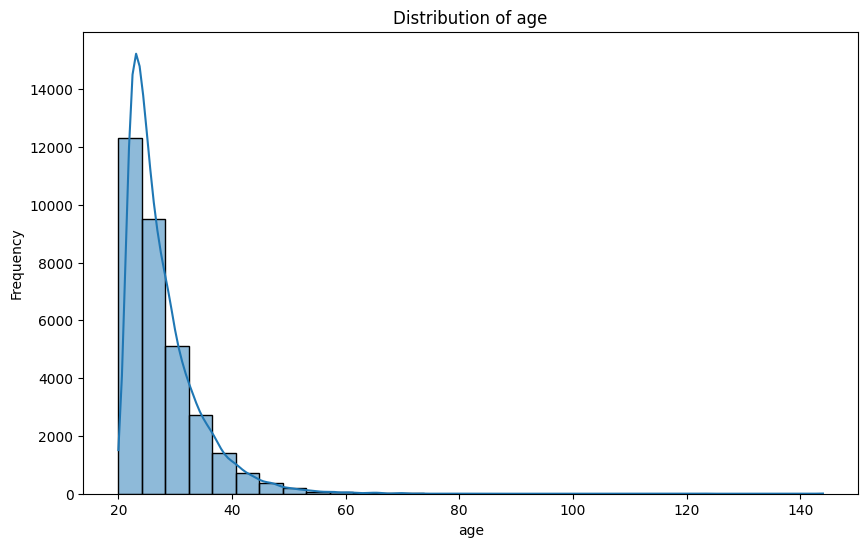

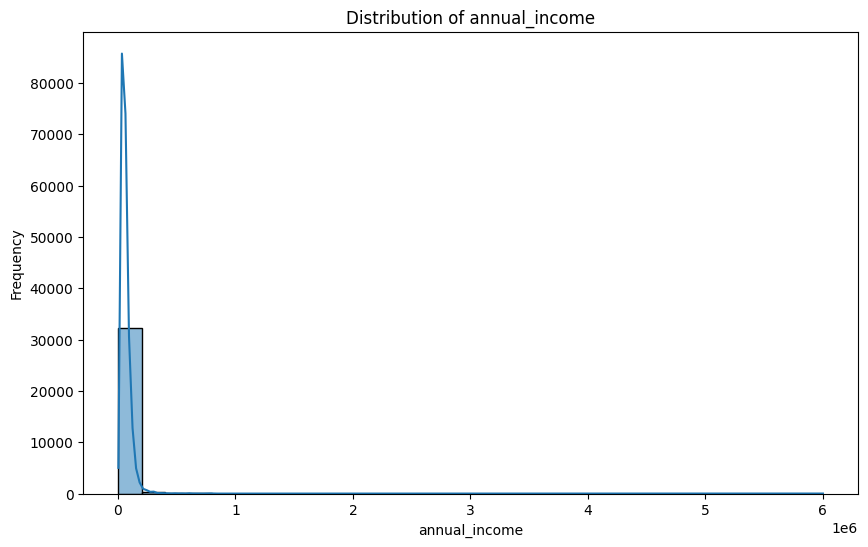

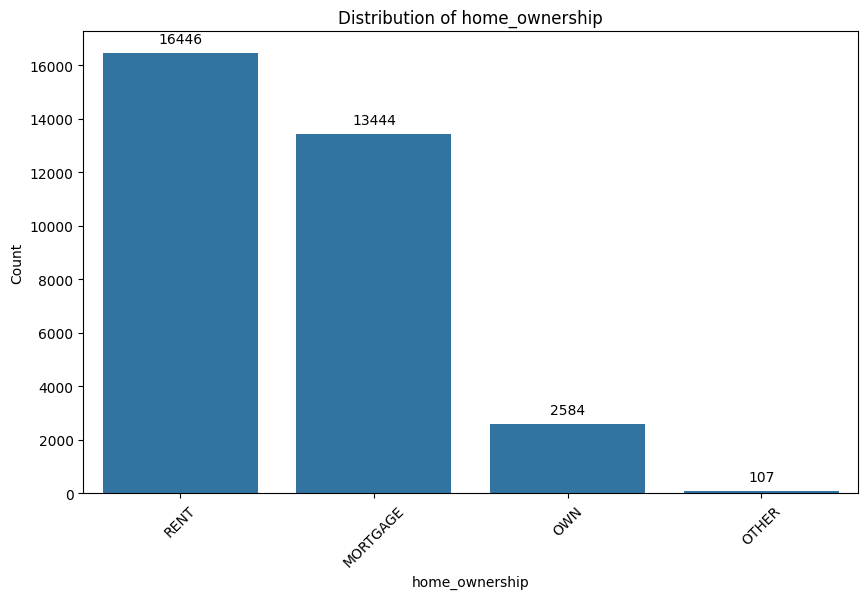

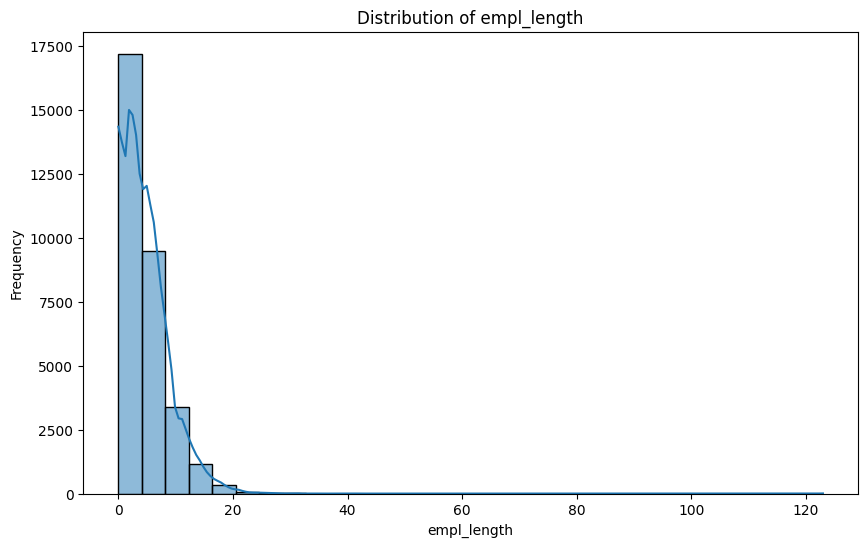

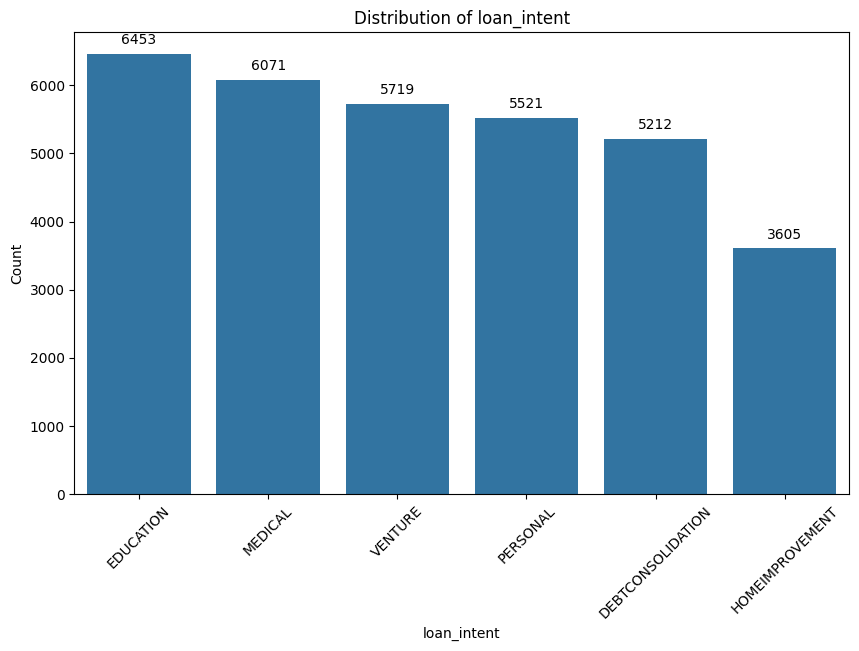

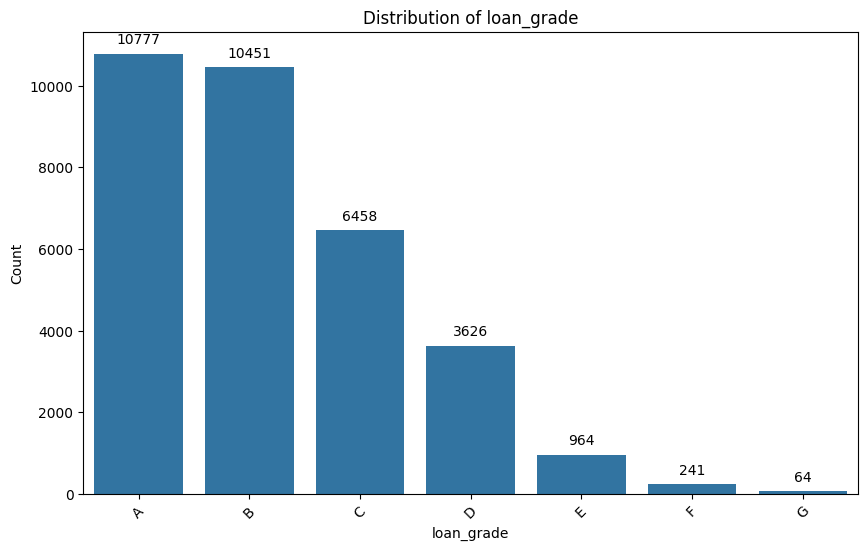

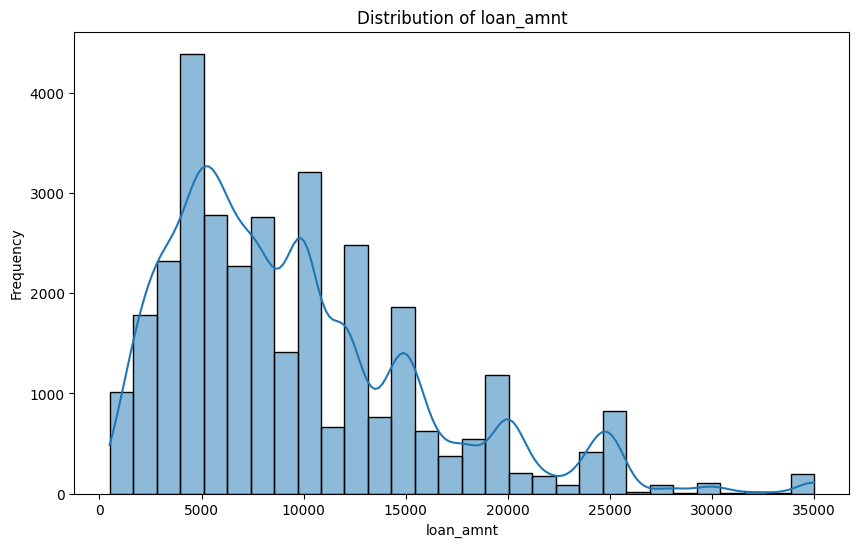

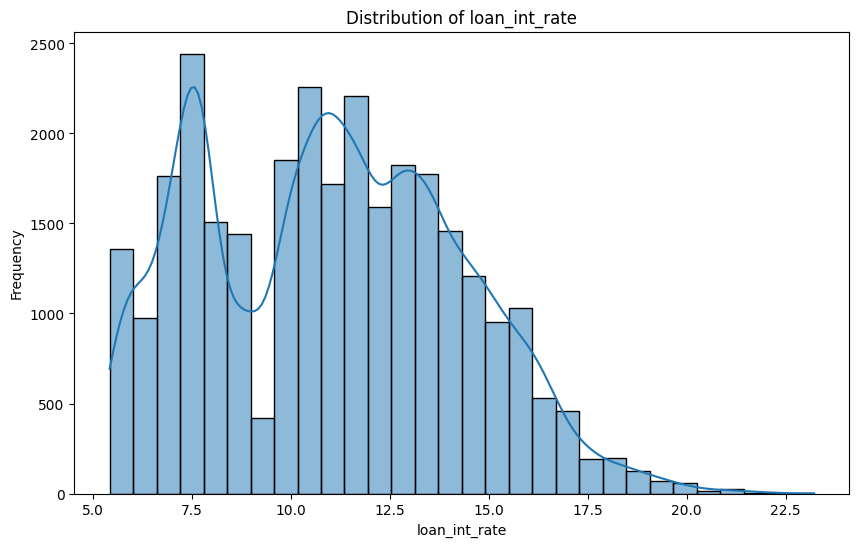

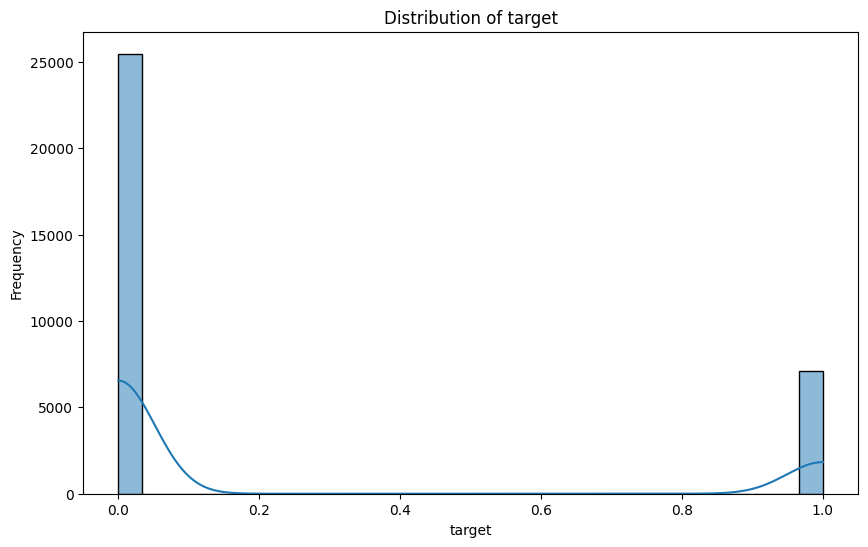

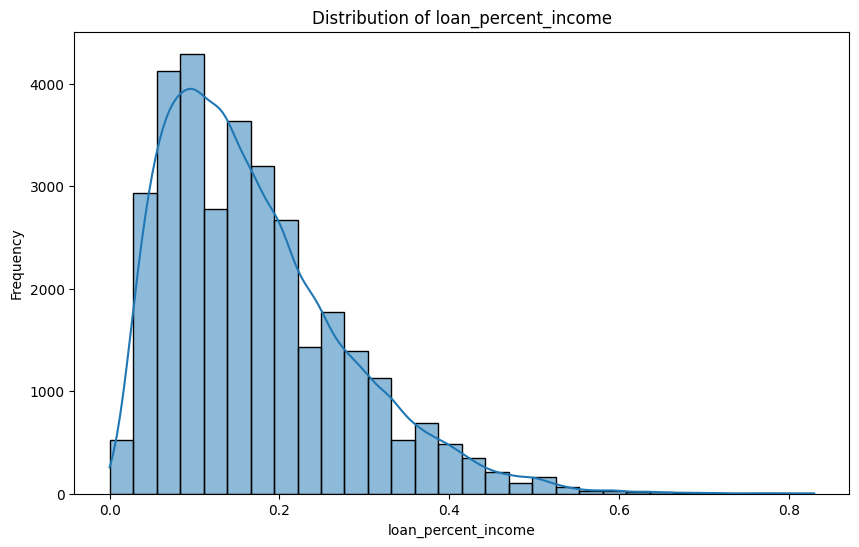

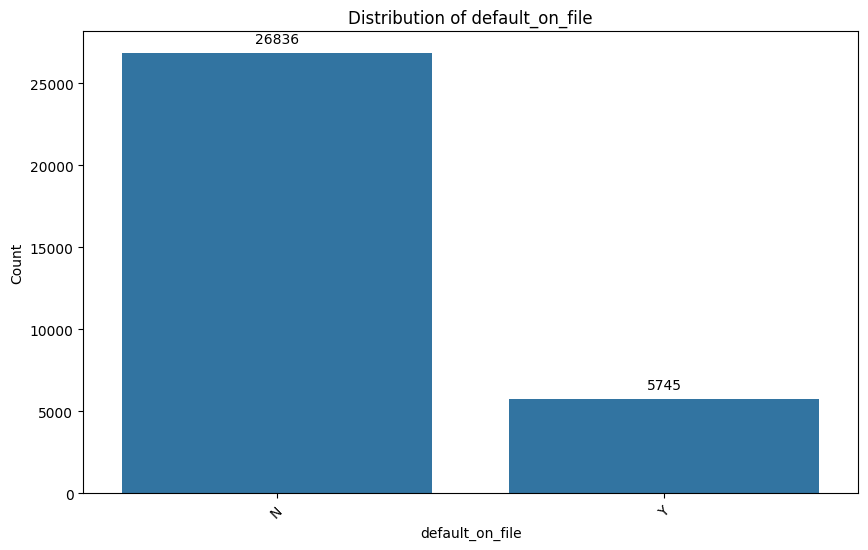

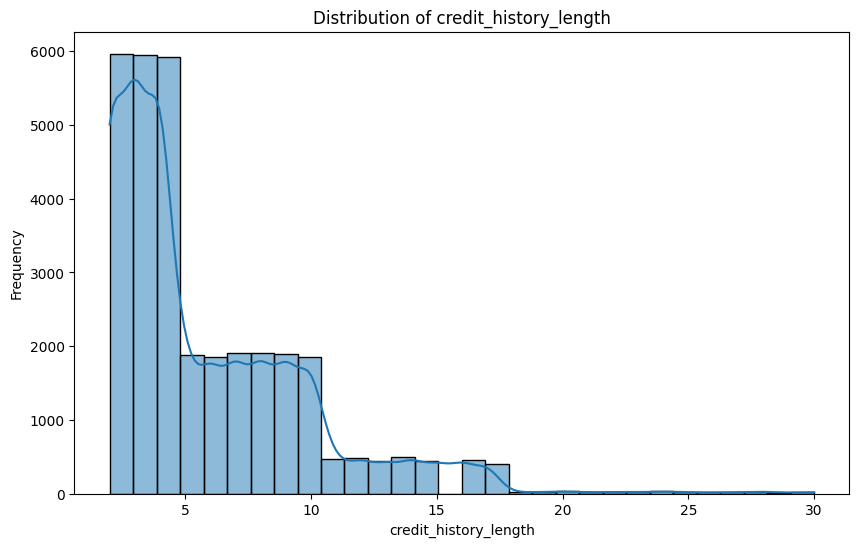

In [10]:
for column in df.columns:
  plot_data_distribution(df, column)

In [11]:
def plot_distribution_by_target(df, column_name):
    plt.figure(figsize=(11, 6))

    if df[column_name].dtype == 'object' or pd.api.types.is_categorical_dtype(df[column_name]):
        # It's categorical, use countplot
        ax = sns.countplot(data=df, x=column_name, hue='target', order=df[column_name].value_counts().index)
        plt.title(f'Distribution of {column_name} by target')
        plt.xlabel(column_name)
        plt.ylabel('Count')
        plt.xticks(rotation=45)

        for p in ax.patches:
            ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                        textcoords='offset points')
    else:
        # It's numerical, use histplot
        sns.histplot(data=df, x=column_name, hue='target', kde=True, bins=30, multiple='stack')
        plt.title(f'Distribution of {column_name} by target')
        plt.xlabel(column_name)
        plt.ylabel('Frequency')

    plt.show()

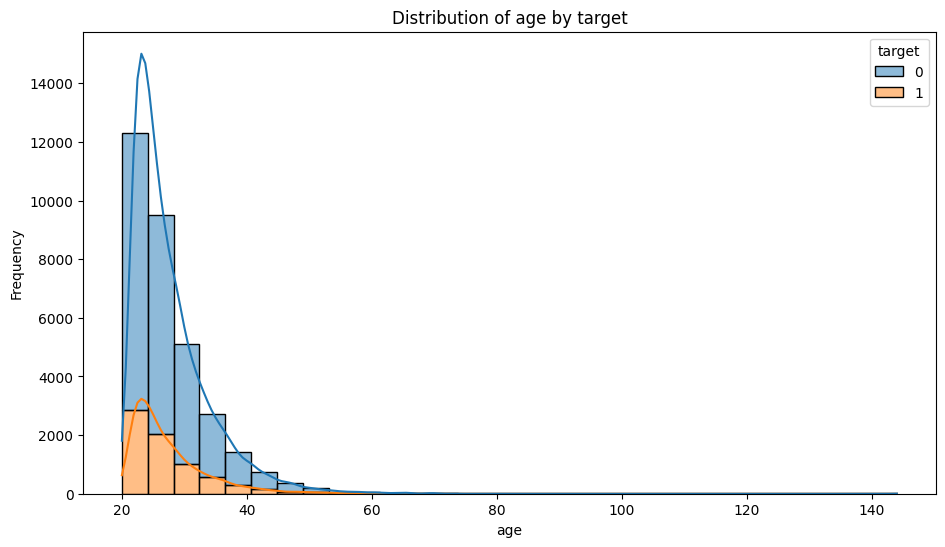

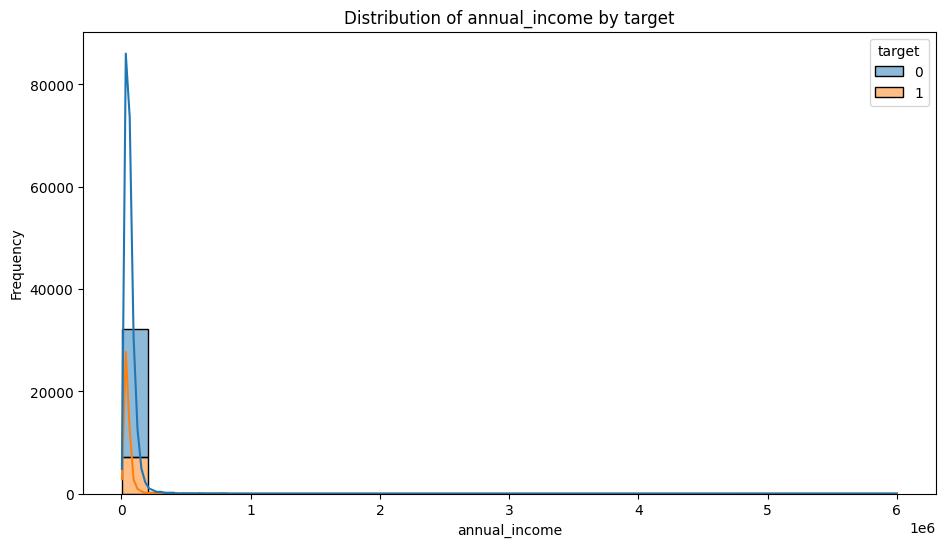

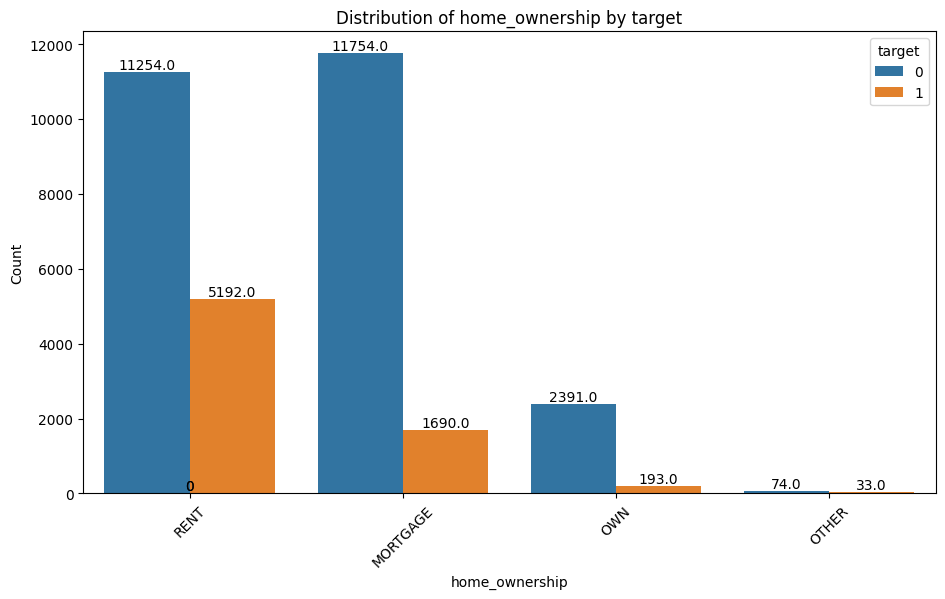

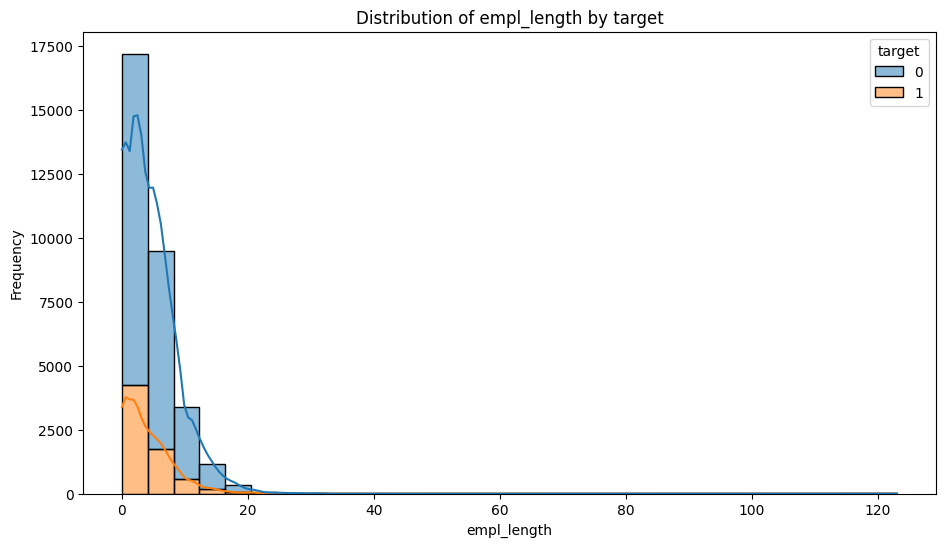

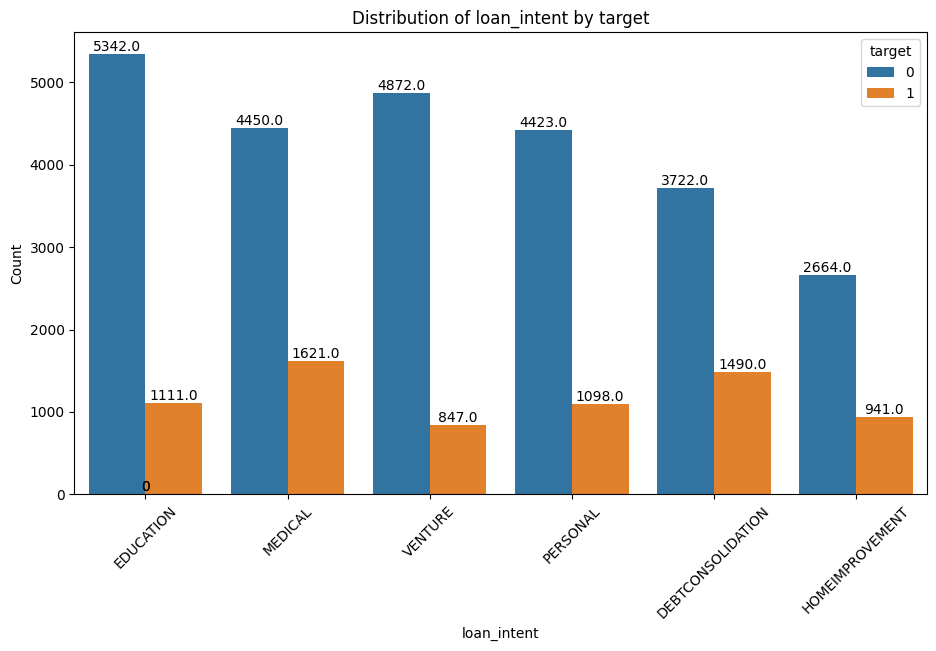

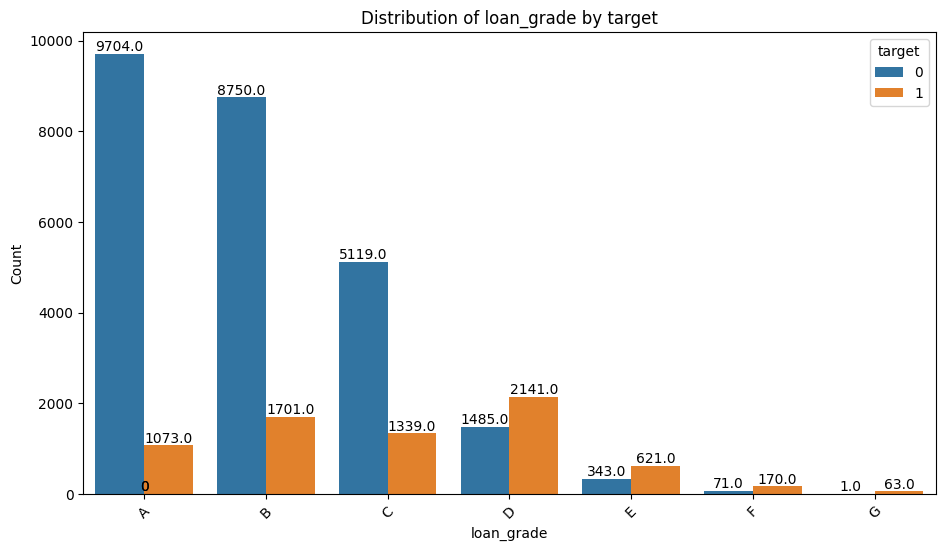

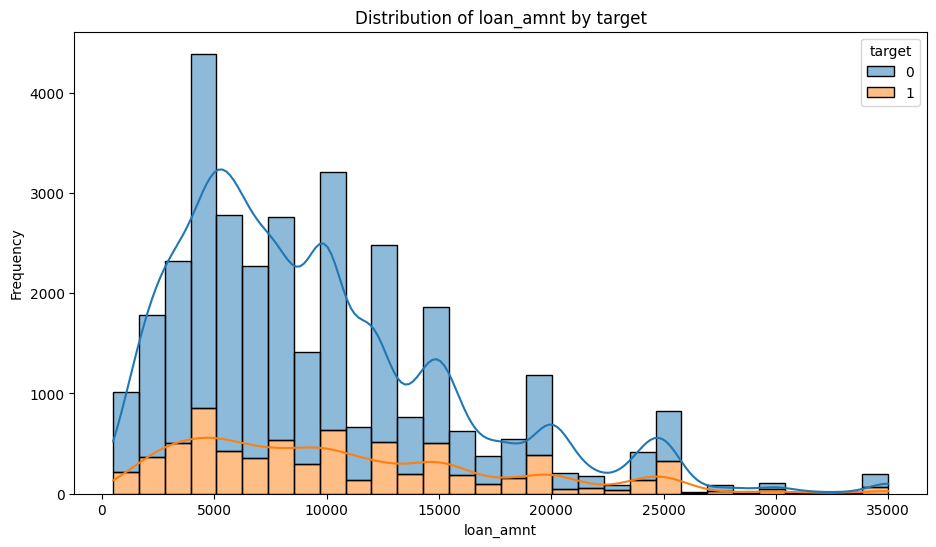

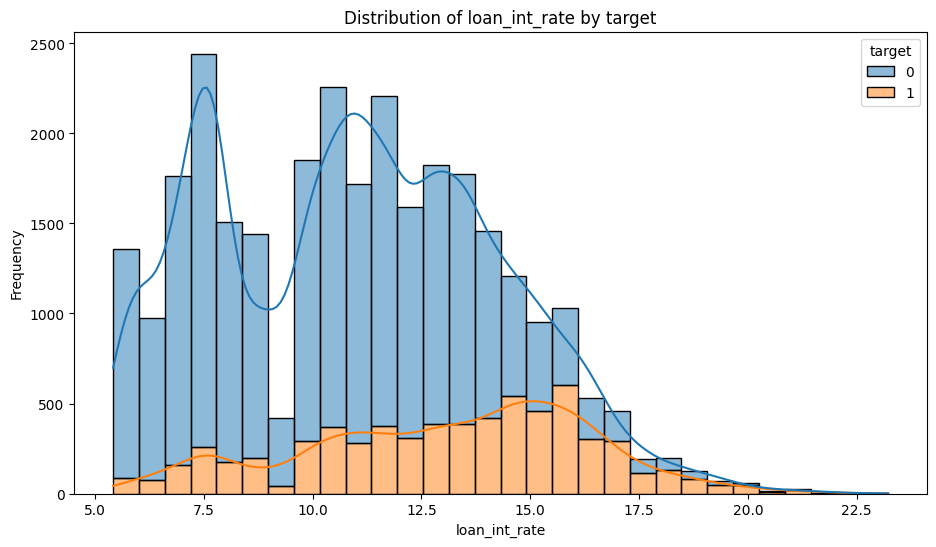

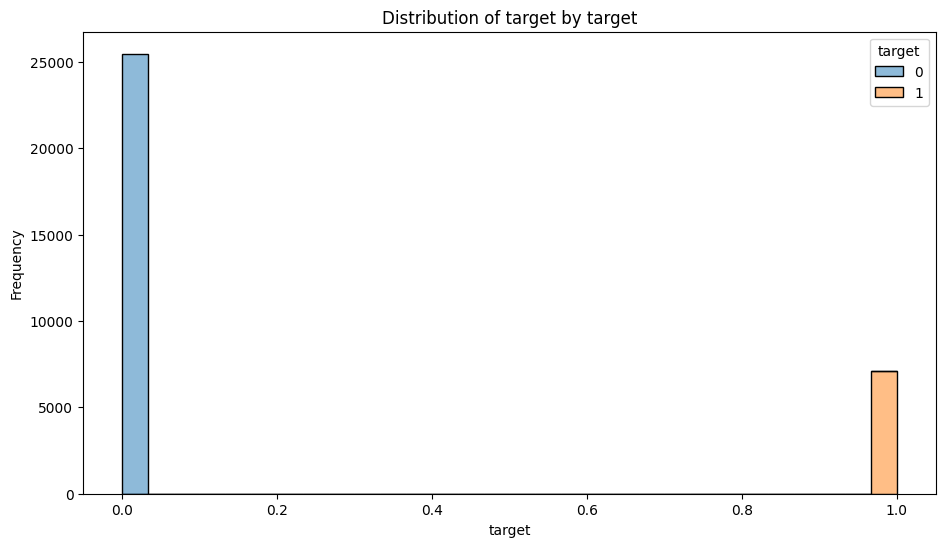

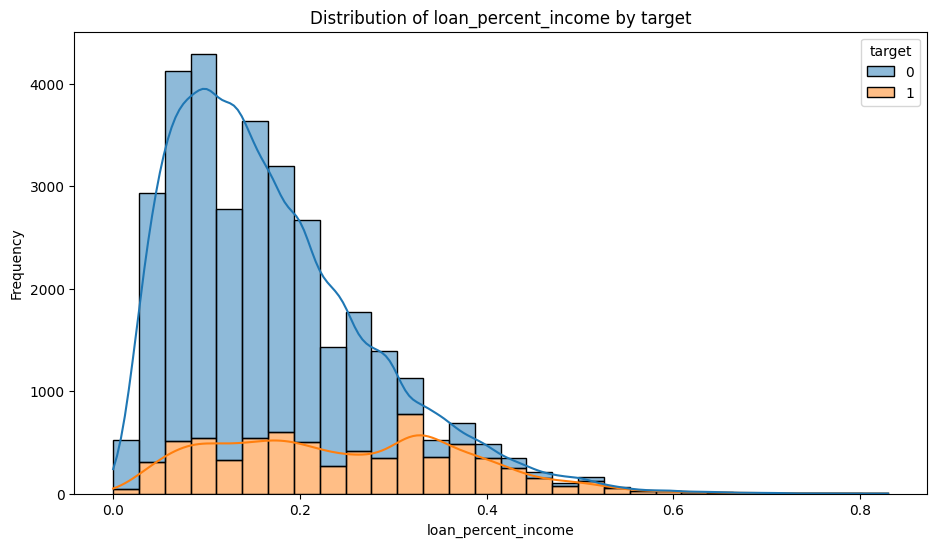

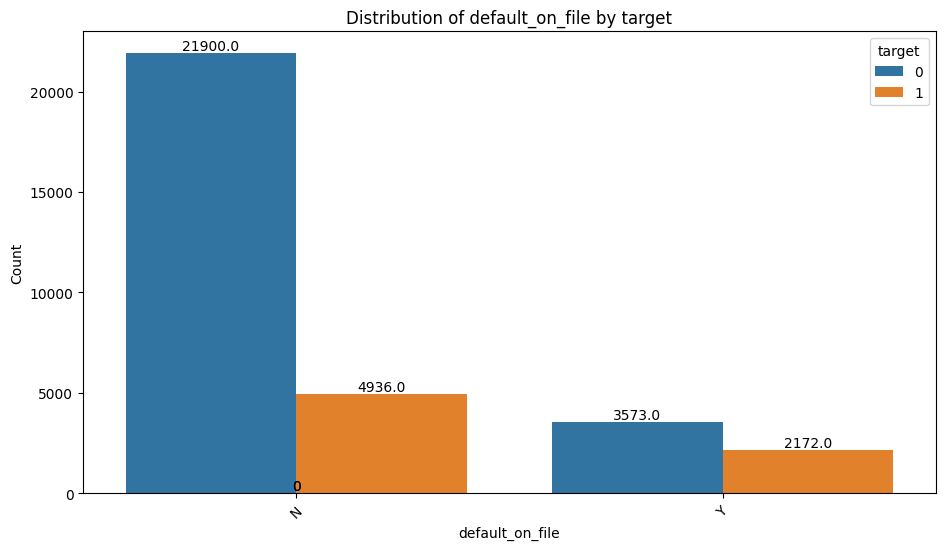

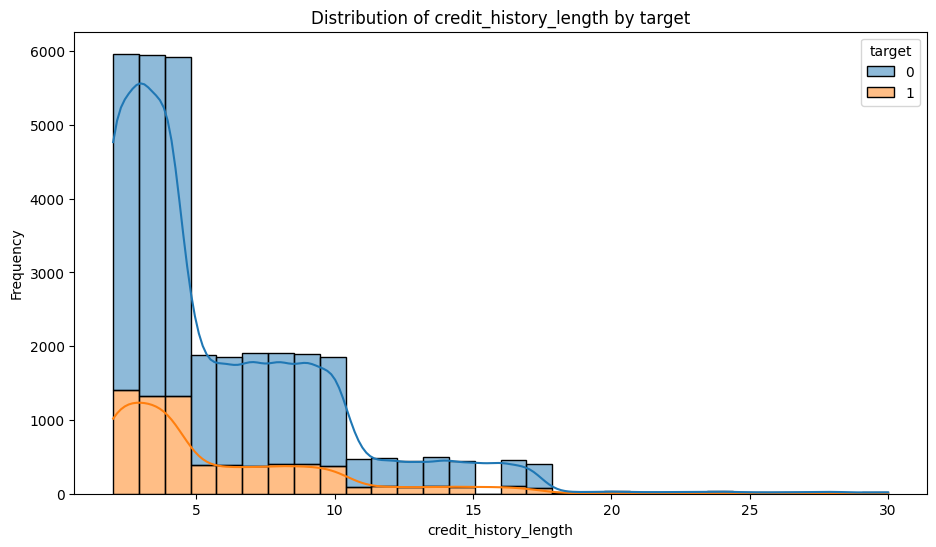

In [12]:
for column in df.columns:
  plot_distribution_by_target(df, column)

In [13]:
# def plot_boxplots(df):
#     numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
#     for column in numeric_columns:
#         plt.figure(figsize=(8, 6))
#         df.boxplot(column=column, vert=False)
#         plt.title(f'Boxplot of {column}')
#         plt.grid(True)
#         plt.show()


In [14]:
# plot_boxplots(df)

In [15]:
df.describe().T.round()

,count,mean,std,min,25%,50%,75%,max
age,32581.0,28.0,6.0,20.0,23.0,26.0,30.0,144.0
annual_income,32581.0,66075.0,61983.0,4000.0,38500.0,55000.0,79200.0,6000000.0
empl_length,31686.0,5.0,4.0,0.0,2.0,4.0,7.0,123.0
loan_amnt,32581.0,9589.0,6322.0,500.0,5000.0,8000.0,12200.0,35000.0
loan_int_rate,29465.0,11.0,3.0,5.0,8.0,11.0,13.0,23.0
target,32581.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
loan_percent_income,32581.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
credit_history_length,32581.0,6.0,4.0,2.0,3.0,4.0,8.0,30.0


age, annual_income, empl_length có giá trị max bất thường --> Drop / Standard Scale

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    32581 non-null  int64  
 1   annual_income          32581 non-null  int64  
 2   home_ownership         32581 non-null  object 
 3   empl_length            31686 non-null  float64
 4   loan_intent            32581 non-null  object 
 5   loan_grade             32581 non-null  object 
 6   loan_amnt              32581 non-null  int64  
 7   loan_int_rate          29465 non-null  float64
 8   target                 32581 non-null  int64  
 9   loan_percent_income    32581 non-null  float64
 10  default_on_file        32581 non-null  object 
 11  credit_history_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


# Categorical columns

In [17]:
cat_cols = df.select_dtypes("object").columns

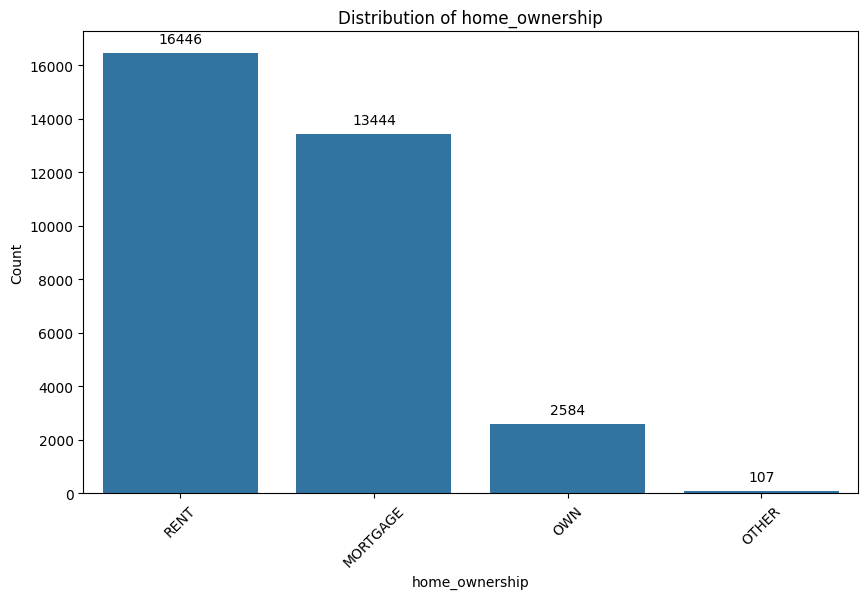

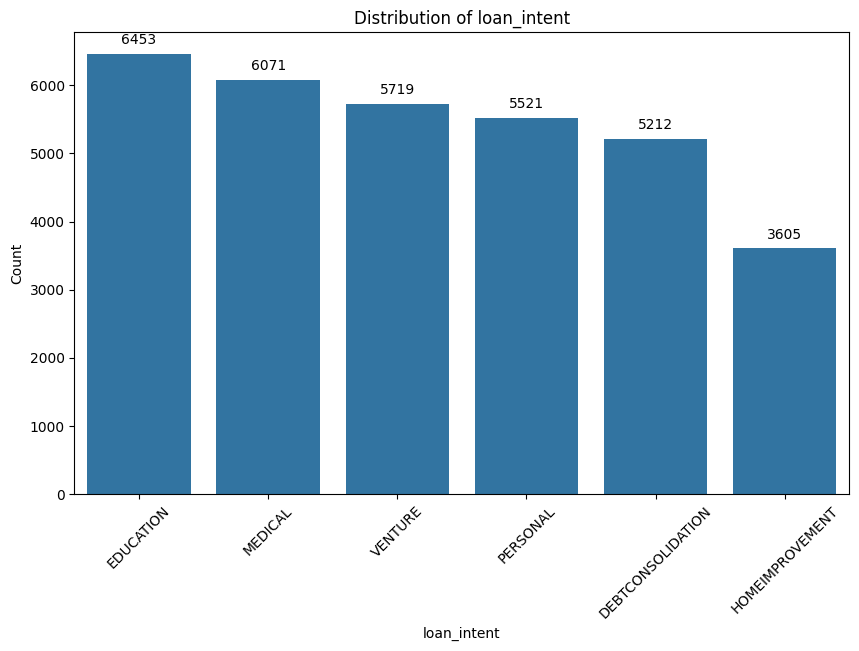

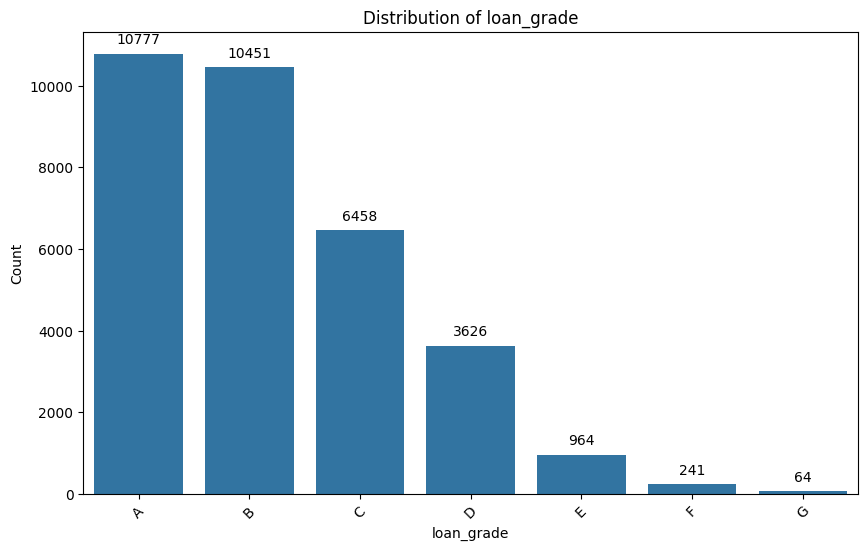

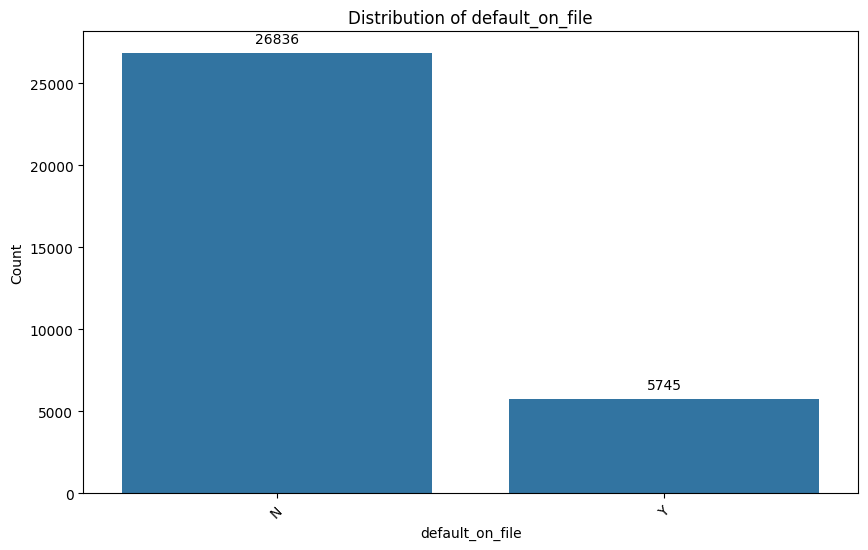

In [18]:
for column in cat_cols:
  plot_data_distribution(df, column)



*   Hầu hết người đi vay đều không có nhà riêng
*   Loan grade A & B chiếm 62.5% tổng
*   Loan intent được phân bố đều
*   Đa số khách hàng không có lịch sử vỡ nợ trên hồ sơ cá nhân






# NUMERICAL COLUMNS

In [19]:
df.select_dtypes(["int64","float"]).columns

Index(['age', 'annual_income', 'empl_length', 'loan_amnt', 'loan_int_rate',
       'target', 'loan_percent_income', 'credit_history_length'],
      dtype='object')

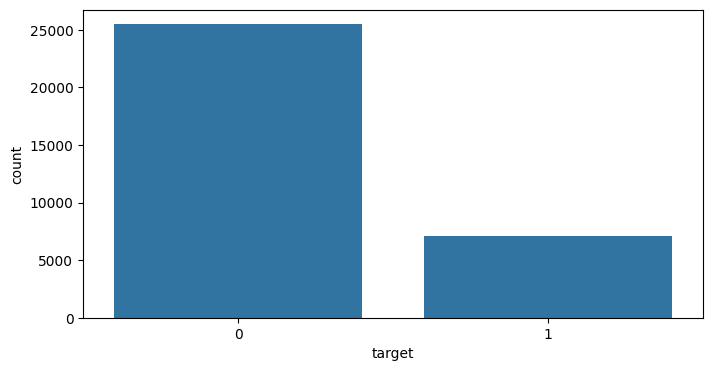

In [20]:
#check imbalance
plt.figure(figsize=(8,4))
sns.countplot(x='target', data=df)
plt.show()

Imbalance --> sử dụng oversampling (KNN-SMOTE)

# DATA PREPROCESSING


1. Removing Outliers

In [21]:
df.shape

(32581, 12)

In [22]:
df = df.loc[df['age']<80, :]

In [23]:
df = df.loc[df['empl_length']<60, :]

In [24]:
df.shape

(31676, 12)



2.  Handle missing values



In [25]:
loan_int_rate_median = df['loan_int_rate'].median()
df['loan_int_rate'].fillna(loan_int_rate_median, inplace=True)

In [26]:
empl_length_median = df['empl_length'].median()
df['empl_length'].fillna(empl_length_median, inplace=True)

In [27]:
missing_values = df.isnull().sum()
print("Số lượng giá trị thiếu trên mỗi cột:")
print(missing_values)

Số lượng giá trị thiếu trên mỗi cột:
age                      0
annual_income            0
home_ownership           0
empl_length              0
loan_intent              0
loan_grade               0
loan_amnt                0
loan_int_rate            0
target                   0
loan_percent_income      0
default_on_file          0
credit_history_length    0
dtype: int64


3. FEATURE ENGINERING

In [28]:
cat_cols = ['loan_grade','home_ownership', 'loan_intent', 'default_on_file']
for col in cat_cols:
    df[col] = df[col].astype(str)

df = pd.get_dummies(df)

In [29]:
df.head()

,age,annual_income,empl_length,loan_amnt,loan_int_rate,target,loan_percent_income,credit_history_length,home_ownership_MORTGAGE,home_ownership_OTHER,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,default_on_file_N,default_on_file_Y
1,21,9600,5.0,1000,11.14,0,0.10,2,False,False,...,False,False,True,False,False,False,False,False,True,False
2,25,9600,1.0,5500,12.87,1,0.57,3,True,False,...,False,False,False,True,False,False,False,False,True,False
3,23,65500,4.0,35000,15.23,1,0.53,2,False,False,...,False,False,False,True,False,False,False,False,True,False
4,24,54400,8.0,35000,14.27,1,0.55,4,False,False,...,False,False,False,True,False,False,False,False,False,True
5,21,9900,2.0,2500,7.14,1,0.25,2,False,False,...,True,True,False,False,False,False,False,False,True,False


In [30]:
# Create loan-to-income ratio
df['loan_to_income_ratio'] = df['loan_amnt'] / df['annual_income']

# Create loan-to-employment length ratio
df['loan_to_emp_length_ratio'] =  df['empl_length']/ df['loan_amnt']

# Create interest rate-to-loan amount ratio
df['int_rate_to_loan_amt_ratio'] = df['loan_int_rate'] / df['loan_amnt']

4. Scale + Onhot

In [31]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler, OneHotEncoder, StandardScaler
from imblearn.pipeline import Pipeline as ImbPipeline

In [32]:
# categorical_ordinal_pipeline = Pipeline(steps=[
#     ("ordinal_encoder", OrdinalEncoder()),
#     ("minmax_scaler", MinMaxScaler())
# ])

# categorical_nominal_pipeline = Pipeline(steps=[
#     ("onehot_encoder", OneHotEncoder())
# ])

# numerical_pipeline = Pipeline(steps=[
#     ("standard_scale", StandardScaler())
# ])

In [33]:
# ord_cols = ['loan_grade']
num_cols = ['age', 'annual_income', 'empl_length', 'loan_amnt', 'loan_int_rate',
            'loan_percent_income', 'loan_to_income_ratio', 'loan_to_emp_length_ratio', 'int_rate_to_loan_amt_ratio']
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])


# SPLIT TRAIN, TEST

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X = df.drop(['target'], axis=1)
y = df['target']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [37]:
X_train.shape, X_test.shape

((25340, 29), (6336, 29))

# apply SMOTE (for oversampling)

In [38]:
from imblearn.over_sampling import SMOTE

In [39]:
smote = SMOTE(k_neighbors=5, random_state=42)

In [40]:
X_train_1, y_train_1 = smote.fit_resample(X_train,y_train)

In [41]:
# X_train_1.shape, X_test.shape

In [42]:
print(y_train.value_counts())

target
0    19900
1     5440
Name: count, dtype: int64


In [43]:
print(y_train_1.value_counts())

target
1    19900
0    19900
Name: count, dtype: int64


# ML Classification Models

In [44]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 2.3 MB/s eta 0:00:00


In [45]:
pip install bayesian-optimization

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
import lightgbm as lgb
from lightgbm import LGBMRegressor
from sklearn.metrics import make_scorer, mean_absolute_error
from sklearn.metrics import mean_squared_error as MSE
from hyperopt import hp, fmin, tpe
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from bayes_opt import BayesianOptimization
from sklearn.model_selection import KFold, cross_val_score
from lightgbm import LGBMClassifier

In [47]:
svc = SVC()
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier()
lrc = LogisticRegression()
rfc = RandomForestClassifier()
abc = AdaBoostClassifier()
bc = BaggingClassifier()
etc = ExtraTreesClassifier()
gbdt = GradientBoostingClassifier()
xgb = XGBClassifier()
cat = CatBoostClassifier(verbose=0)
lgb = lgb.LGBMClassifier()

In [52]:
clfs = {
    # 'SVC' : svc,
    'KN' : knc,
    # 'NB': mnb,
    'LRC': lrc,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb,
    'cat':cat,
    'lgb':lgb
}

In [56]:
from sklearn.metrics import precision_score, accuracy_score, recall_score, confusion_matrix, roc_auc_score, f1_score

In [57]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_scores = clf.predict_proba(X_test)[:, 1]  # get the probabilities for the positive class

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)  # Calculate F1 Score
    auc = roc_auc_score(y_test, y_scores)  # Calculate AUC

    # Calculate confusion matrix to get TN and FP for specificity
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn + fp)

    return accuracy, precision, recall, specificity, f1, auc

In [58]:
accuracy_scores = []
precision_scores = []
recall_scores = []
specificity_scores = []
f1_scores = []
auc_scores = []

for name, clf in clfs.items():
    current_accuracy, current_precision, current_recall, current_specificity, current_f1, current_auc = train_classifier(clf, X_train, y_train, X_test, y_test)

    print(f"For {name}:")
    print(f"Accuracy - {current_accuracy}")
    print(f"Precision - {current_precision}")
    print(f"Recall - {current_recall}")
    print(f"Specificity - {current_specificity}")
    print(f"F1 Score - {current_f1}")
    print(f"AUC - {current_auc}")
    print()

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    recall_scores.append(current_recall)
    specificity_scores.append(current_specificity)
    f1_scores.append(current_f1)
    auc_scores.append(current_auc)

For KN:
Accuracy - 0.8817866161616161
Precision - 0.83125
Recall - 0.5761732851985559
Specificity - 0.9672793375075742
F1 Score - 0.6805970149253732
AUC - 0.8455774168074568

For LRC:
Accuracy - 0.8693181818181818
Precision - 0.772238514173998
Recall - 0.5703971119133574
Specificity - 0.9529388002423753
F1 Score - 0.6561461794019934
AUC - 0.869322246098407

For DT:
Accuracy - 0.8843118686868687
Precision - 0.7239010989010989
Recall - 0.7610108303249098
Specificity - 0.9188042819632397
F1 Score - 0.7419922562478002
AUC - 0.8399075561440748

For LR:
Accuracy - 0.8693181818181818
Precision - 0.772238514173998
Recall - 0.5703971119133574
Specificity - 0.9529388002423753
F1 Score - 0.6561461794019934
AUC - 0.869322246098407

For RF:
Accuracy - 0.9299242424242424
Precision - 0.9653808110781404
Recall - 0.7046931407942238
Specificity - 0.9929307210664512
F1 Score - 0.8146911519198663
AUC - 0.9275919170324051

For AdaBoost:
Accuracy - 0.8817866161616161
Precision - 0.7864864864864864
Recall - 

In [59]:
classifier_names = list(clfs.keys())

# Create a DataFrame
scores_df = pd.DataFrame({
    'Classifier': classifier_names,
    'Accuracy': accuracy_scores,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'Specificity': specificity_scores,
    'F1 Score': f1_scores,
    'AUC': auc_scores
})

scores_df

,Classifier,Accuracy,Precision,Recall,Specificity,F1 Score,AUC
0,KN,0.881787,0.831250,0.576173,0.967279,0.680597,0.845577
1,LRC,0.869318,0.772239,0.570397,0.952939,0.656146,0.869322
2,DT,0.884312,0.723901,0.761011,0.918804,0.741992,0.839908
3,LR,0.869318,0.772239,0.570397,0.952939,0.656146,0.869322
4,RF,0.929924,0.965381,0.704693,0.992931,0.814691,0.927592
5,AdaBoost,0.881787,0.786486,0.630325,0.952131,0.699800,0.889020
6,BgC,0.928346,0.938737,0.719134,0.986871,0.814391,0.911914
7,ETC,0.922664,0.939156,0.690975,0.987477,0.796173,0.911581
8,GBDT,0.923769,0.940430,0.695307,0.987679,0.799502,0.918549
9,xgb,0.931345,0.945591,0.727798,0.988285,0.822521,0.944599


# Hyperparameter Tuning

1. Random Forest Classifier

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, recall_score, precision_recall_curve
from sklearn.metrics import roc_auc_score

In [ ]:
n_iter = 20
cv = 5

In [ ]:
random_grid_rf = {'n_estimators': [600],
               'max_features' : ['sqrt'],
               'max_depth': [20, 21, 25],
               'min_samples_split': [1, 2 , 3],
               'min_samples_leaf': [4],
               'bootstrap': [True, False],
               'class_weight' : ['balanced', 'balanced_subsample']}

In [ ]:
random_search_rf = RandomizedSearchCV(estimator=RandomForestClassifier(),
                                param_distributions = random_grid_rf,
                                n_iter = n_iter,
                                scoring='recall',
                                cv = cv,
                                verbose=0,
                                random_state=42,
                                n_jobs = -1)
# Fit the random search model
random_search_rf.fit(X_train_1, y_train_1)
# Print the best score and the corresponding hyperparameters
print(f'The best score is {random_search_rf.best_score_:.3f}')
print(f'The best hyperparameters are {random_search_rf.best_params_}')

The best score is 0.899
The best hyperparameters are {'n_estimators': 600, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 25, 'class_weight': 'balanced_subsample', 'bootstrap': False}


In [ ]:
rf_opti=random_search_rf.best_estimator_
y_pred_rf_opti = rf_opti.predict(X_test)
print(classification_report(y_test,y_pred_rf_opti))
f1_rf_opti = f1_score(y_test, y_pred_rf_opti, average='weighted')
print('F1-score average is: %.3f' %(f1_rf_opti))
recall_rf_opti = recall_score(y_test, y_pred_rf_opti, pos_label=1, average='binary')
print('Recall score (class 1) is: %.3f' %(recall_rf_opti))
from sklearn.metrics import roc_auc_score
y_pred_proba_rf_opti = rf_opti.predict_proba(X_test)[:, 1]
auc_rf_opti = roc_auc_score(y_test, y_pred_proba_rf_opti)
print('AUC score is: %.3f' %(auc_rf_opti))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      4951
           1       0.91      0.73      0.81      1385

    accuracy                           0.92      6336
   macro avg       0.92      0.85      0.88      6336
weighted avg       0.92      0.92      0.92      6336

F1-score average is: 0.921
Recall score (class 1) is: 0.726
AUC score is: 0.925


2. XGBoost Classifier

In [ ]:
# Define the search space
random_grid_xgb = {
    "learning_rate": [0.005, 0.01, 0.02, 0.03, 0.05],
    "max_depth": [2, 3, 4, 5, 6, 7, 8, 9, 10],
    "gamma": [0, 0.001, 0.01, 0.1, 1, 5], #Minimum loss reduction to make a split
    "min_child_weight" : [1, 2, 3, 4],  #Minimum sum of weights of all observations required in a child
    "colsample_bytree": [0.5, 0.6, 0.7, 0.8, 0.9, 1.0], #subsample ratio of columns when constructing each tree
    "reg_alpha": [0, 1e-2, 0.1, 1], #L1 regularization term on weights
    "reg_lambda": [0, 1e-2, 0.1, 1],  #L2 regularization term on weights
    "scale_pos_weight": [1,2,3,4,5] #It deals with imbalanced datasets. It's calculated as the ratio between bigger class vs smaller class
     }

In [ ]:
# Define random search
random_search_xgb = RandomizedSearchCV(estimator=XGBClassifier(),
                           param_distributions=random_grid_xgb,
                           n_iter = 50,
                           scoring = 'recall',
                           n_jobs = -1,
                           cv = 5,
                           verbose = 0,
                           random_state = 42)
# Fit grid search
random_search_xgb.fit(X_train_1, y_train_1)
# Print the best score and the corresponding hyperparameters
print(f'The best score is {random_search_xgb.best_score_:.3f}')
print(f'The best hyperparameters are {random_search_xgb.best_params_}')

The best score is 1.000
The best hyperparameters are {'scale_pos_weight': 3, 'reg_lambda': 0, 'reg_alpha': 0, 'min_child_weight': 2, 'max_depth': 3, 'learning_rate': 0.005, 'gamma': 0.1, 'colsample_bytree': 1.0}


In [ ]:
xgb_opti=random_search_xgb.best_estimator_
y_pred_xgb_opti = xgb_opti.predict(X_test)
print(classification_report(y_test,y_pred_xgb_opti))
f1_xgb_opti = f1_score(y_test, y_pred_xgb_opti, average='weighted')
print('F1-score average is: %.3f' %(f1_xgb_opti))
recall_xgb_opti = recall_score(y_test, y_pred_xgb_opti, pos_label=1, average='binary')
print('Recall score (class 1) is: %.3f' %(recall_xgb_opti))
y_pred_proba_xgb_opti = xgb_opti.predict_proba(X_test)[:, 1]
auc_xgb_opti = roc_auc_score(y_test, y_pred_proba_xgb_opti)
print('AUC score for optimized XGBoost model is: %.3f' % (auc_xgb_opti))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4951
           1       0.22      1.00      0.36      1385

    accuracy                           0.22      6336
   macro avg       0.11      0.50      0.18      6336
weighted avg       0.05      0.22      0.08      6336

F1-score average is: 0.078
Recall score (class 1) is: 1.000
AUC score for optimized XGBoost model is: 0.870


3. CATBoost Classifier

In [ ]:
random_grid_catb = {'iterations' : [100, 200, 500], #Maximum number of trees that can be built.
               'learning_rate': [0.001, 0.005, 0.01], #The rate at which the model weights are updated after working through each batch of training examples.
               'depth':[2, 3, 4, 5, 6, 7, 8, 9, 10], #Depth of tree
               'subsample' : [0.1, 0.5, 0.8], #Fraction of the entire dataset to produce each tree
               'colsample_bylevel' : [0.05, 0.1, 0.5], #Fraction of features to be chosen at each node for each split during tree building process
               'l2_leaf_reg': [1,2,3,4,5], #Coefficient for the L2 regularization term of the cost function.
               'min_data_in_leaf' : [1,5,10,50,100,150], #Minimum number of samples required to create a leaf
               'scale_pos_weight': [1,2,3,4]} #It deals with imbalanced datasets. It's calculated as the ratio between bigger class vs smaller class

In [ ]:
random_search_catb = RandomizedSearchCV(estimator = CatBoostClassifier(verbose=False),
                                param_distributions = random_grid_catb,
                                n_iter = n_iter,
                                scoring='recall',
                                cv = cv,
                                verbose=False,
                                random_state=42,
                                n_jobs = -1);
# Fit the random search model
random_search_catb.fit(X_train_1, y_train_1);
# Print the best score and the corresponding hyperparameters
print(f'The best score is {random_search_catb.best_score_:.3f}');
print(f'The best hyperparameters are {random_search_catb.best_params_}');

The best score is 1.000
The best hyperparameters are {'subsample': 0.8, 'scale_pos_weight': 3, 'min_data_in_leaf': 150, 'learning_rate': 0.01, 'l2_leaf_reg': 4, 'iterations': 100, 'depth': 2, 'colsample_bylevel': 0.05}


In [ ]:
catb_opti=random_search_catb.best_estimator_
y_pred_catb_opti = catb_opti.predict(X_test)
print(classification_report(y_test,y_pred_catb_opti));
f1_catb_opti = f1_score(y_test, y_pred_catb_opti, average='weighted')
print('F1-score average is: %.3f' %(f1_catb_opti));
recall_catb_opti = recall_score(y_test, y_pred_catb_opti, pos_label=1, average='binary')
print('Recall score (class 1) is: %.3f' %(recall_catb_opti));
y_pred_proba_catb_opti = catb_opti.predict_proba(X_test)[:, 1]
auc_catb_opti = roc_auc_score(y_test, y_pred_proba_catb_opti)
print('AUC score for optimized CatBoost model is: %.3f' % (auc_catb_opti))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4951
           1       0.22      1.00      0.36      1385

    accuracy                           0.22      6336
   macro avg       0.11      0.50      0.18      6336
weighted avg       0.05      0.22      0.08      6336

F1-score average is: 0.078
Recall score (class 1) is: 1.000
AUC score for optimized CatBoost model is: 0.843


4. lightgbm

In [ ]:
random_grid_lgbm = {
    'num_leaves': [31, 50, 70],  # Số lượng lá tối đa cho mỗi cây
    'max_depth': [10, 20, 30],  # Độ sâu tối đa của cây
    'learning_rate': [0.01, 0.05, 0.1],  # Tốc độ học
    'n_estimators': [100, 200, 500],  # Số lượng cây
    'min_split_gain': [0.0, 0.1],  # Lợi ích tối thiểu để thực hiện phân chia thêm
    'min_child_weight': [0.001, 0.01],  # Tổng cộng trọng số quan sát tối thiểu trong một nút con
    'subsample': [0.8, 1.0],  # Tỷ lệ subsample
    'colsample_bytree': [0.8, 1.0],  # Tỷ lệ subsample cho mỗi cây
}


In [ ]:
n_iter = 100
cv = 5

random_search_lgbm = RandomizedSearchCV(
    estimator=LGBMClassifier(),
    param_distributions=random_grid_lgbm,
    n_iter=n_iter,
    scoring='recall',
    cv=cv,
    verbose=True,
    random_state=42,
    n_jobs=-1
)
random_search_lgbm.fit(X_train_1, y_train_1)
print(f'The best score is {random_search_lgbm.best_score_:.3f}')
print(f'The best hyperparameters are {random_search_lgbm.best_params_}')


Fitting 5 folds for each of 100 candidates, totalling 500 fits
[LightGBM] [Info] Number of positive: 19900, number of negative: 19900
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011734 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2361
[LightGBM] [Info] Number of data points in the train set: 39800, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
The best score is 0.926
The best hyperparameters are {'subsample': 0.8, 'num_leaves': 70, 'n_estimators': 500, 'min_split_gain': 0.0, 'min_child_weight': 0.01, 'max_depth': 30, 'learning_rate': 0.1, 'colsample_bytree': 0.8}


In [ ]:
lgbm_opti = random_search_lgbm.best_estimator_
y_pred_lgbm_opti = lgbm_opti.predict(X_test)
print(classification_report(y_test, y_pred_lgbm_opti))
f1_lgbm_opti = f1_score(y_test, y_pred_lgbm_opti, average='weighted')
print(f'F1-score average is: {f1_lgbm_opti:.3f}')
recall_lgbm_opti = recall_score(y_test, y_pred_lgbm_opti, pos_label=1, average='binary')
print(f'Recall score (class 1) is: {recall_lgbm_opti:.3f}')
y_pred_proba_lgbm_opti = lgbm_opti.predict_proba(X_test)[:, 1]
auc_lgbm_opti = roc_auc_score(y_test, y_pred_proba_lgbm_opti)
print(f'AUC score for optimized LightGBM model is: {auc_lgbm_opti:.3f}')

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      4951
           1       0.95      0.74      0.83      1385

    accuracy                           0.93      6336
   macro avg       0.94      0.86      0.90      6336
weighted avg       0.94      0.93      0.93      6336

F1-score average is: 0.932
Recall score (class 1) is: 0.741
AUC score for optimized LightGBM model is: 0.944


In [ ]:
model_df['Overall_Score'] = model_df[['Accuracy', 'Precision', 'Recall', 'Specificity']].mean(axis=1)

top_5_models = model_df.sort_values(by='Overall_Score', ascending=False).head(5)

top_5_models

,Model,Accuracy,Precision,Recall,Specificity,Overall_Score
11,cat,0.933239,0.958969,0.725632,0.991315,0.902289
12,lgb,0.932449,0.966829,0.715523,0.993133,0.901984
10,xgb,0.931187,0.939759,0.732130,0.986871,0.897487
5,RF,0.923769,0.905576,0.727076,0.978792,0.883803
7,BgC,0.916982,0.879082,0.719134,0.972329,0.871882


In [ ]:
top_5_models.reset_index(drop=True, inplace=True)
top_5_models.index += 1

top_5_models

,Model,Accuracy,Precision,Recall,Specificity,Overall_Score
1,cat,0.933239,0.958969,0.725632,0.991315,0.902289
2,lgb,0.932449,0.966829,0.715523,0.993133,0.901984
3,xgb,0.931187,0.939759,0.732130,0.986871,0.897487
4,RF,0.923769,0.905576,0.727076,0.978792,0.883803
5,BgC,0.916982,0.879082,0.719134,0.972329,0.871882


In [ ]:
feature_importances = cat.feature_importances_

feature_names = X_train.columns

feature_importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

print(feature_importances_df)

                          Feature  Importance
2                     empl_length   18.506847
0                             age   13.936771
5             loan_percent_income   11.876482
26           loan_to_income_ratio    7.651872
10            home_ownership_RENT    6.784601
1                   annual_income    6.435936
20                   loan_grade_D    5.900557
13    loan_intent_HOMEIMPROVEMENT    3.905334
11  loan_intent_DEBTCONSOLIDATION    3.587890
4                   loan_int_rate    3.398154
14            loan_intent_MEDICAL    2.818397
7         home_ownership_MORTGAGE    2.195171
15           loan_intent_PERSONAL    1.817724
12          loan_intent_EDUCATION    1.670505
27       loan_to_emp_length_ratio    1.645905
21                   loan_grade_E    1.434317
16            loan_intent_VENTURE    1.035501
19                   loan_grade_C    0.869183
3                       loan_amnt    0.658226
9              home_ownership_OWN    0.645072
28     int_rate_to_loan_amt_ratio 

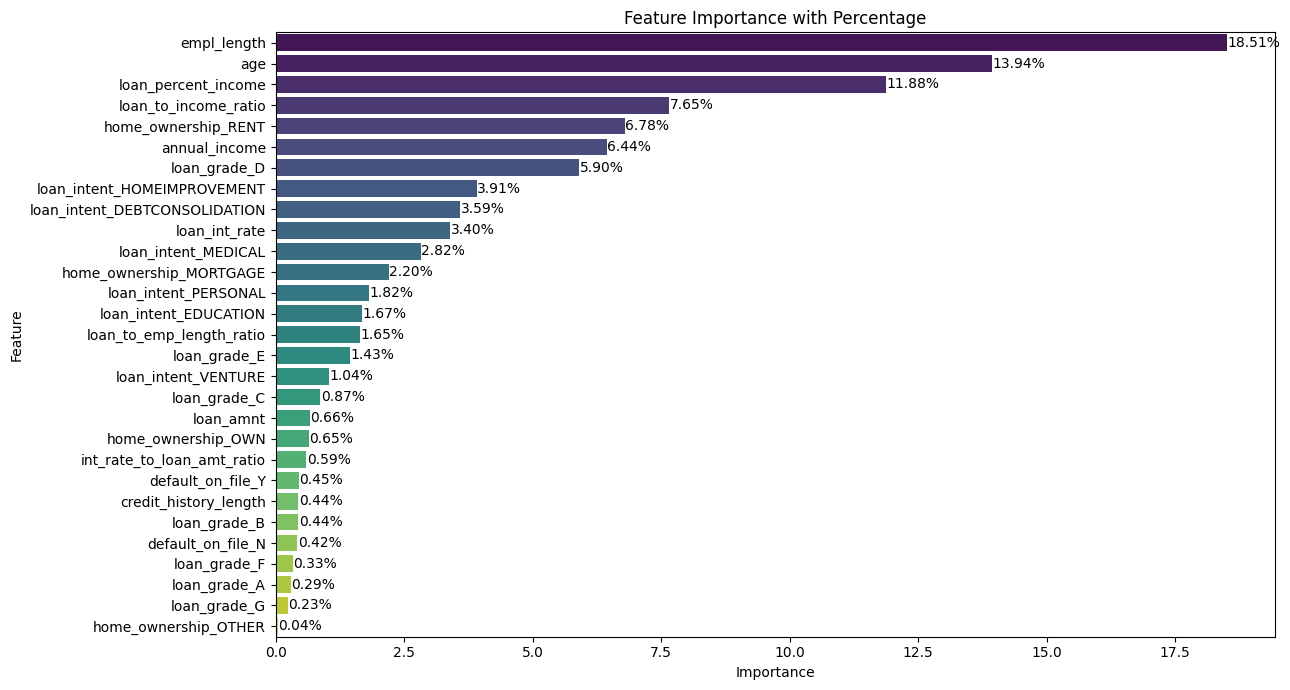

In [ ]:
plt.figure(figsize=(13, 7))
barplot = sns.barplot(x='Importance', y='Feature', data=feature_importances_df, palette='viridis')

total = feature_importances_df['Importance'].sum()
for p in barplot.patches:
    width = p.get_width()
    plt.text(width + 0.01,
             p.get_y() + p.get_height() / 2,
             '{:1.2f}%'.format((width / total) * 100),
             va='center')

plt.title('Feature Importance with Percentage')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()